In [1]:
import numpy as np
import pandas as pd
import os,sys
import datetime 
from datetime import timedelta
import matplotlib.pyplot as plt  ### We are going to plot the results in this notebook
import numpy as np
from mpl_toolkits.basemap import Basemap
%matplotlib nbagg

from Functions_for_animations import indices,compute_derivative,id_names_txt,avaliable_stations_vel,derivative


2023-07-28 11:01:32.835879: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-28 11:01:32.852968: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Enter the root directory folder:  /home/giacomo/Documents/


Directory found: /home/giacomo/Documents/Denoiser_GPS/sharing_gratsid_tf_in_development
Num GPUs Available:  0
TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### Set Imput folder - Area

In [2]:
cd='/home/giacomo/Documents/Cascadia/'

In [114]:
############## I falsify latitude e longitude of the stations with exactly the same location ##############
df = pd.read_csv(cd+'stations_coordinates.txt', delimiter=',',names=['station','latitude','longitude'],header=None)
latitude=list(df.latitude)
longitude=list(df.longitude)

duplicates_longitudes=dict((x, indices(longitude, x)) for x in set(longitude) if longitude.count(x) > 1) # Find  
for i in list(duplicates_longitudes.values()):
    longitude[i[1]]=longitude[i[1]]+0.00001

duplicates_latitudes=dict((x, indices(latitude, x)) for x in set(latitude) if latitude.count(x) > 1)
for i in list(duplicates_latitudes.values()):
    latitude[i[1]]=latitude[i[1]]+0.00001

df.latitude=latitude
df.longitude=longitude

### Set Map boundaries and quiver properties

In [71]:

#Cascadia:

width=475000
height=750000

lat_1=44
lat_2=49.9
lat_0=46.7
lon_0=-124


## Quiver properities
ww = 0.002
hh = 4
qscal = 1e-4

### Example - Plotting Stations

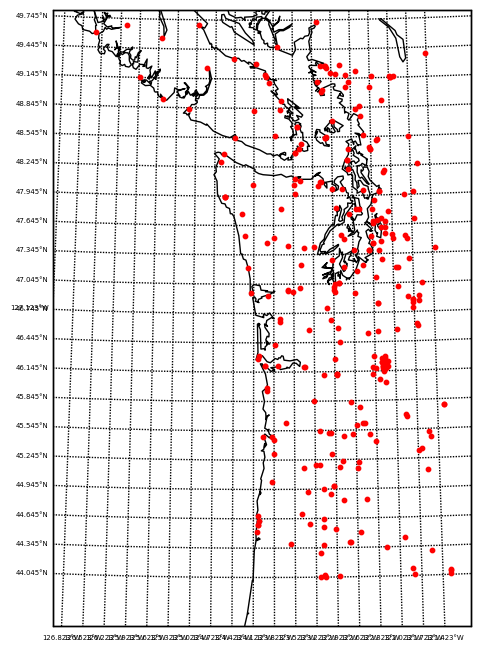

In [5]:
%matplotlib inline
##### Making the basemap
fig, axes = plt.subplots(1,1,figsize=(10,8))
fig.subplots_adjust(wspace=0, hspace=0)

#Raw plot da salvare all images
xl = np.arange(np.amin(df.longitude), np.amax(df.longitude), 0.3) #grid_space is the desired delta/step of the output array
yl = np.arange(np.amin(df.latitude), np.amax(df.latitude), 0.3)
parallels = yl
meridians = xl
levels = np.linspace(-0.005,0.005,100)
   
m = Basemap(ax=axes,width=475000,height=700000,projection='lcc',
            resolution='i',lat_1=44,lat_2=np.amax(df.latitude),lat_0=46.7,lon_0=-124)

basexx,baseyy=m(longitude,latitude)
m.scatter(basexx, baseyy, 10, marker='o', color='Red', zorder=3)

m.drawcoastlines()
m.drawparallels(parallels,labels=[1,0,0,1],fontsize=5)
m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=5)
m.drawmapboundary(fill_color='white')  




### Period of interest

In [6]:
t = np.arange(datetime.datetime(2010,1,1), datetime.datetime(2023,1,1), datetime.timedelta(days=1)).astype(datetime.datetime)

### Components and Flags

In [7]:
componentsT=['E','N','U'] 
#### Choose components ####
indC=[0,1] #,2
components=list(np.array(componentsT)[indC])
print('You are using these components: ',np.array(componentsT)[indC])
gratsid_flag=True
exp_flag=True


namesT=[]
if gratsid_flag==True and exp_flag==True:
    for c in components:
        namesT.append([c,'DL_'+c,'EMV_'+c,'GrAtSiD_'+c])
else:
    for c in components:
        namesT.append([c,'DL_'+c])
names = [item for sublist in namesT for item in sublist]
names = ['YYMMDD'] + names
print(names)


You are using these components:  ['E' 'N']
['YYMMDD', 'E', 'DL_E', 'EMV_E', 'GrAtSiD_E', 'N', 'DL_N', 'EMV_N', 'GrAtSiD_N']


### Set input_length, Derivative step and componets

In [19]:
input_length=31
to_end=3
position=input_length-to_end
step=1

soln_folder_path=cd+'Filtered_'+str(input_length)+'_'+str(position)
vel_folder=soln_folder_path+'_vel_'+str(step)+'d'

if not os.path.exists(vel_folder):
    os.makedirs(vel_folder)
    print(vel_folder," created successfully")
    compute_derivative(soln_folder_path,step,names,vel_folder)
else:
    print(vel_folder," already exists")

/home/giacomo/Documents/Cascadia/Filtered_31_28_vel_1d  created successfully
(739, 8) (738, 8)
(1473, 8) (1472, 8)
(8076, 8) (8075, 8)
(5949, 8) (5948, 8)
(7228, 8) (7227, 8)
(3215, 8) (3214, 8)
(1963, 8) (1962, 8)
(3369, 8) (3368, 8)
(1983, 8) (1982, 8)
(1203, 8) (1202, 8)
(1392, 8) (1391, 8)
(4539, 8) (4538, 8)
(1928, 8) (1927, 8)
(4086, 8) (4085, 8)
(4023, 8) (4022, 8)
(4041, 8) (4040, 8)
(1986, 8) (1985, 8)
(4500, 8) (4499, 8)
(1958, 8) (1957, 8)
(4053, 8) (4052, 8)
(3158, 8) (3157, 8)
(1146, 8) (1145, 8)
(1927, 8) (1926, 8)
(4070, 8) (4069, 8)
(1929, 8) (1928, 8)
(5537, 8) (5536, 8)
(5573, 8) (5572, 8)
(3007, 8) (3006, 8)
(3502, 8) (3501, 8)
(994, 8) (993, 8)
(4427, 8) (4426, 8)
(1800, 8) (1799, 8)
(2275, 8) (2274, 8)
(2005, 8) (2004, 8)
(2328, 8) (2327, 8)
(4955, 8) (4954, 8)
(5123, 8) (5122, 8)
(3178, 8) (3177, 8)
(5752, 8) (5751, 8)
(1697, 8) (1696, 8)
(1154, 8) (1153, 8)
(1738, 8) (1737, 8)
(7995, 8) (7994, 8)
(7667, 8) (7666, 8)
(4791, 8) (4790, 8)
(4854, 8) (4853, 8)
(7867, 

### Select Stations

In [88]:
list_stations=id_names_txt(vel_folder)
Stations,dft=avaliable_stations_vel(vel_folder,list_stations,t,names)

10%
20%
30%
40%
50%
60%
70%
80%
90%


### Choose which quantity to plot

In [122]:
filtered_df = df[df['station'].isin(list_stations)]

what_to_plot='DL' #GrAtSiD,EMV
what_c=[]

quali=[i for i in range(len(names)) if what_to_plot in names[i]]

### Make Plot

In [ ]:
#### Check intersections between coordinates and txt files

fig, ax = plt.subplots(1,1,figsize=(10,8))
fig.subplots_adjust(wspace=0, hspace=0)
m = Basemap(ax=ax,width=475000,height=700000,projection='lcc',
            resolution='i',lat_1=lat_1,lat_2=lat_2,lat_0=lat_0,lon_0=lon_0)
North=[]
Est=[]
Up=[]
Latitude=[]
Longitude=[]

f=0
for i in range(len(Stations[0:10])):

    station=Stations[f][i][0]
    aa=vel_folder+'/'+str(station)+'.txt'
    
    line_number = Stations[f][i][1]
    with open(aa, 'r') as file:
        for _ in range(line_number - 1):
            file.readline()       
        line = file.readline()
    
    split_line=line.split()
    Lat=float(filtered_df[filtered_df.station==station].latitude)
    Lon=float(filtered_df[filtered_df.station==station].longitude)
    E=split_line[quali[0]]
    N=split_line[quali[1]]
    
    Est.append(E)
    North.append(N)
    Latitude.append(Lat)
    Longitude.append(Lon)
    if len(quali)>2:
        Up.append(split_line[quali[2]])

x,y = m(Latitude, Longitude)
ha_hor = m.quiver(np.array(x), np.array(y), np.array(Est).astype('float'), np.array(North).astype('float'), scale=qscal,color='blue',width=ww,headwidth=hh)




def update(frame):
   
    for f in range(len(Stations)) :   
        North=[]
        Est=[]
        Up=[]
        Latitude=[]
        Longitude=[]
        
        for i in range(len(Stations[f])):
        
            station=Stations[f][i][0]
            aa=vel_folder+'/'+str(station)+'.txt'
            
            line_number = Stations[f][i][1]
            with open(aa, 'r') as file:
                for _ in range(line_number - 1):
                    file.readline()       
                line = file.readline()
            
            split_line=line.split()
            print(station)
            Lat=float(filtered_df[filtered_df.station==station].latitude)
            Lon=float(filtered_df[filtered_df.station==station].longitude)
            E=split_line[quali[0]]
            N=split_line[quali[1]]
            
            Est.append(E)
            North.append(N)
            Latitude.append(Lat)
            Longitude.append(Lon)
            if len(quali)>2:
                Up.append(split_line[quali[2]])
                
        x,y = m(Latitude, Longitude)
        ha_hor = m.quiver(x, y, np.array(Est).astype('float'), np.array(North).astype('float'), scale=qscal, scale_units='inches',color='blue',width=ww,headwidth=hh)
        ax.set_title('t = '+ str(t[f]),fontsize=8) 
        ha_hor.remove()
    
    #line.set_data(x_data[:frame], y_data[:frame])
    #arrow.set_xy([x_data[frame], y_data[frame]])
    return 

# Create the animation
animation = FuncAnimation(fig, update,frames=None)


/tmp/ipykernel_146028/3981339051.py:88: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animation = FuncAnimation(fig, update,frames=None)


ALBH
ARLI
BAMF
BCES
BCNS
BELI
BFIR
BLYN
BRNB
BSUM
CATH
CBLV
CHCM
CHWK
CHZZ
CLRS
CNCR
CORV
COUG
CPXF
CPXX
CROK
CSHR
CSKI
CUSH
CVO1
ELIZ
ELSR
ENUM
FRID
FTS5
FTS6
GLDR
GRMD
GRP4
GWN5
GWN6
HLSY
HUSB
IWAC
JIME
JRO1
KRMT
KTBW
LCSO
LKCP
LNGB
LPSB
LSIG
MCSO
MHTL
MKAH
MON3
MRSD
MUIR
NANO
NEAH
NINT
NTKA
OBEC
OBSR
OCEN
ONAB
ORPO
OYLR
P064
P367
P374
P375
P376
P377
P378
P379
P383
P384
P385
P387
P395
P396
P397
P398
P399
P400
P401
P402
P403
P404
P405
P406
P407
P408
P409
P410
P411
P412
P414
P415
P416
P417
P418
P419
P420
P421
P423
P424
P425
P426
P427
P429
P431
P432
P435
P436
P437
P438
P439
P440
P441
P442
P446
P687
P688
P689
P691
P692
P694
P695
P696
P697
P698
P699
P700
P701
P702
P703
P705
P791
P792
PABH
PCOL
PCS2
PDXA
PER1
PFLD
PGC5
PKDL
PKWD
PNCL
PNHG
PRDY
PSEA
PTAL
PTRF
PUPU
RPT5
RPT6
RYMD
SAMM
SC02
SC04
SCMV
SEAI
SEAS
SEAT
SEDK
SEDR
SKMA
SMAI
SNOQ
SQIM
SSHO
STAY
STHM
TACO
TFNO
TGAU
TGUA
THAR
THUN
TILL
TPW2
TSTU
TUMW
TWHL
TWIW
UCLU
UFDA
VCWA
WAKI
WAPO
WASQ
WDBN
WHD5
WHD6
WMSG
YELM
ZSE1
ALBH
ARLI
BAMF


In [120]:
df[df.station=='GBN2']

,station,latitude,longitude
63,GBN2,44.559,-121.565


In [116]:
 df

,station,latitude,longitude
0,AL2H,48.38980,-123.48750
1,ALBH,48.38981,-123.48749
2,ARLI,48.17410,-122.14190
3,BAMF,48.83530,-125.13510
4,BCAB,49.05220,-122.32950
...,...,...,...
286,WHD6,48.31240,-122.69609
287,WIFR,44.05970,-121.81760
288,WMSG,45.13130,-121.59730
289,YELM,46.94870,-122.60570


In [67]:
from matplotlib.animation import FuncAnimation
animation = FuncAnimation(fig, update)

In [80]:
filtered_df[filtered_df.station==station].latitude

Series([], Name: latitude, dtype: float64)

In [81]:
station

'DEA2'